In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q1 = "SELECT * FROM facts LIMIT 5;"
data1 = pd.read_sql_query(q1, conn)
print(data1)

   id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46  


In [4]:
#Using Pandas DF Manip
#q2 = "SELECT population, population_growth FROM facts;"
#data2 = pd.read_sql_query(q2, conn)

#min_pop = data2['population'].min()
#max_pop = data2['population'].max()
#min_grow = data2['population_growth'].min()
#max_grow = data2['population_growth'].max()

#Using SQL
q2 = "SELECT MAX(population), MIN(population), MAX(population_growth), MIN(population_growth) FROM facts;"
data2 = pd.read_sql_query(q2, conn)
print(data2)




   MAX(population)  MIN(population)  MAX(population_growth)  \
0       7256490011                0                    4.02   

   MIN(population_growth)  
0                     0.0  


In [6]:
q3 = "SELECT name, population FROM facts WHERE population = 0;"
data3 = pd.read_sql_query(q3, conn)
print(data3)

q4 = "SELECT name, population FROM facts WHERE population = 7256490011;"
data4 = pd.read_sql_query(q4, conn)
print(data4)

#This is not overly surprising

         name  population
0  Antarctica           0
    name  population
0  World  7256490011


/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27a325dcf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f27a3167b38>]], dtype=object)

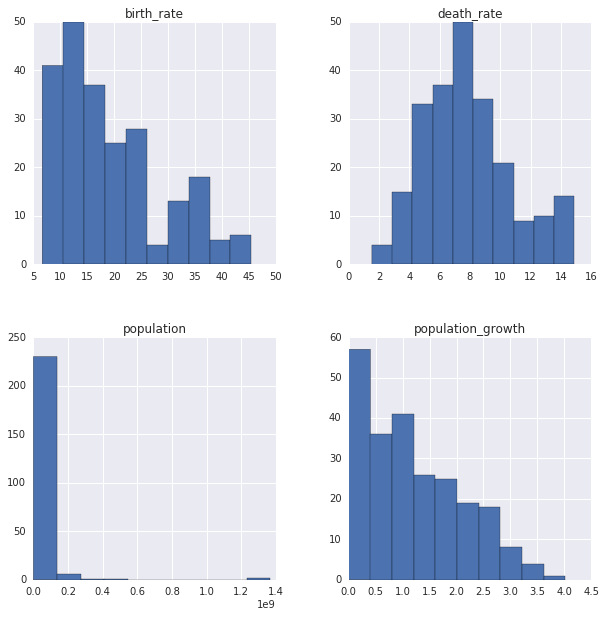

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q5 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
data5 = pd.read_sql_query(q5, conn)
data5.hist(ax=ax)

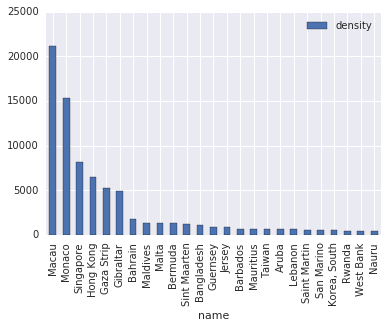

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q6 = '''Select name, CAST(CAST(population as float)/CAST(area as float) as INT)as density 
from facts
where population != (select MAX(population) from facts)
and population != (select MIN(population) from facts)
and area != (select MIN(area) from facts)
and area != (select MIN(area) from facts)
ORDER BY density DESC
LIMIT 25;
'''
data6 = pd.read_sql_query(q6, conn)#, index_col='name')
fig = plt.figure(figsize=(10,10))
ax = data6['name']
data6.plot(kind='bar', x=ax)
#data6.hist(x=ax)
plt.show()

#Top 25 countries by density
#Interesting that they seem to be reasonably geographically diverse (i.e. not all in asia)

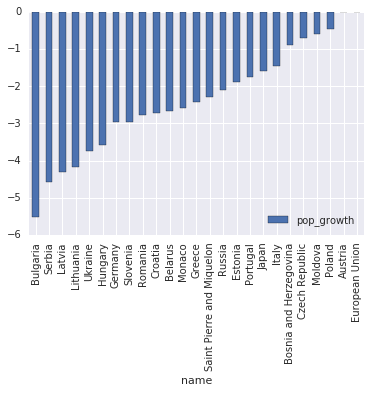

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q7 = '''Select name, CAST(birth_rate as float) - CAST(death_rate as float) as pop_growth
from facts
where population != (select MAX(population) from facts)
and population != (select MIN(population) from facts)
and birth_rate != 0
and death_rate != 0
ORDER BY pop_growth ASC
LIMIT 25;
'''
data7 = pd.read_sql_query(q7, conn)#, index_col='name')
fig = plt.figure(figsize=(10,10))
ax = data7['name']
data7.plot(kind='bar', x=ax)
#data6.hist(x=ax)
plt.show()

#Top 25 countries dieing the fastest
#Not what I was expecting at all, I was expecting Japan as the #1 result. 

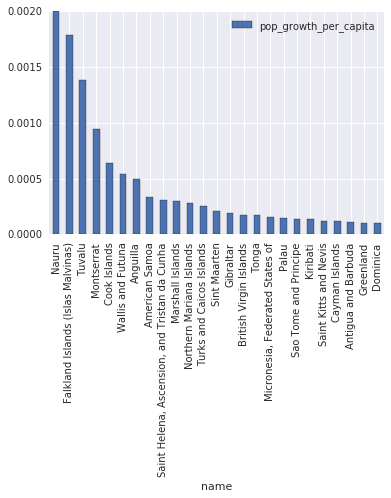

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q7 = '''Select name, (CAST(birth_rate as float) - CAST(death_rate as float)) / CAST(population as float) as pop_growth_per_capita
from facts
where population != (select MAX(population) from facts)
and population != (select MIN(population) from facts)
and birth_rate != 0
and death_rate != 0
ORDER BY pop_growth_per_capita DESC
LIMIT 25;
'''
data7 = pd.read_sql_query(q7, conn)#, index_col='name')
fig = plt.figure(figsize=(10,10))
ax = data7['name']
data7.plot(kind='bar', x=ax)
#data6.hist(x=ax)
plt.show()

#Top 25 fastest growing countries per capita
#Next I'll limit it to only reasonably high population countries, I think this method of comparison favors small countries

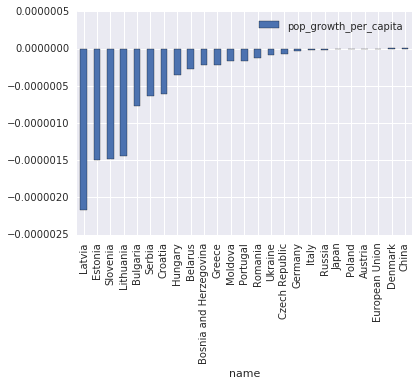

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

q7 = '''Select name, (CAST(birth_rate as float) - CAST(death_rate as float)) / CAST(population as float) as pop_growth_per_capita
from facts
where population != (select MAX(population) from facts)
and population != (select MIN(population) from facts)
and birth_rate != 0
and death_rate != 0
and population > 100000
ORDER BY pop_growth_per_capita ASC
LIMIT 25;
'''
data7 = pd.read_sql_query(q7, conn)#, index_col='name')
fig = plt.figure(figsize=(10,10))
ax = data7['name']
data7.plot(kind='bar', x=ax)
#data6.hist(x=ax)
plt.show()

#Top 25 fastest dieing countries with population of atleast 100,000
#Eastern Europe is clearly the winner here
#It would be cool if we had GDP values here to compare